# Forest CoverType Feature Importances
We will address two questions in this notebook:
* Which features are most important for predicting forest cover type?
* Can we reduce the number of features without impacting accuracy?

In the first notebook we studied this dataset, we were able to achieve 96.545% accuracy on the dataset using Bagging Classifier with n_estimators=100. We will use the same random number generator seed (random_state=2020) in splitting the training and test sets as well as training models for consistency.

## Step 1: Loading libraries to be used in the modeling, loading the dataset, and splitting the data into training and test sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('numpy version: ',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version: ',sns.__version__)

numpy version:  1.18.1
pandas version:  0.25.3
seaborn version:  0.9.0


In [2]:
#loading the data from a csv file downloaded from UCI Machine Learning Repository

data = pd.read_csv('datasets/forestcovertype.csv', header=None)
X = data.iloc[:, 0:54]
y = data.iloc[:, 54]

The features in the dataset are as follows:
* (column 0) Elevation / quantitative /meters / Elevation in meters
* (column 1) Aspect / quantitative / azimuth / Aspect in degrees azimuth
* (column 2) Slope / quantitative / degrees / Slope in degrees
* (column 3) Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
* (column 4) Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
* (column 5) Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
* (column 6) Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
* (column 7) Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
* (column 8) Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
* (column 9) Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
* (columns 10-13) Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
* (columns 14-53) Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation

The response variable is:
* Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

Although there are 54 columns in the dataset, there are only 12 features.

In [3]:
#changing columns 10 thru 53 into categorical variables 

for n in range(10,54):
    X.iloc[:, n] = X.iloc[:, n].astype('category')

C:\Users\vava\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


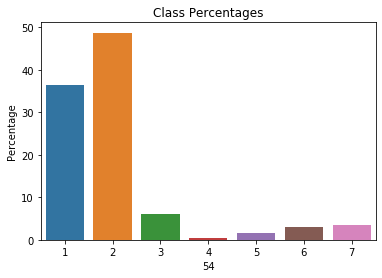

In [4]:
#class percentages

class_perc = pd.DataFrame(y).groupby(54).size() / 581012 * 100
class_perc = pd.DataFrame(class_perc)
class_perc.columns = ['Percentage']
sns.barplot(data=class_perc, x=class_perc.index, y='Percentage')
plt.title('Class Percentages')
plt.show()

In [5]:
# I am setting 30% data aside for the test set.
# also assuring that the data is split in a stratified way
random_seed = 2020

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=random_seed)

## Step 2: Feature importances
We will use Extra Trees Classifier, Random Forest Classifier, and Permutation method to derive feature importances from the training set.

### Tree Based Methods

In [6]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
model_ETC = ExtraTreesClassifier(random_state=random_seed, n_jobs=-1)
model_RF = RandomForestClassifier(random_state=random_seed, n_jobs=-1)
model_ETC.fit(X_train, y_train)
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2020, verbose=0,
                       warm_start=False)

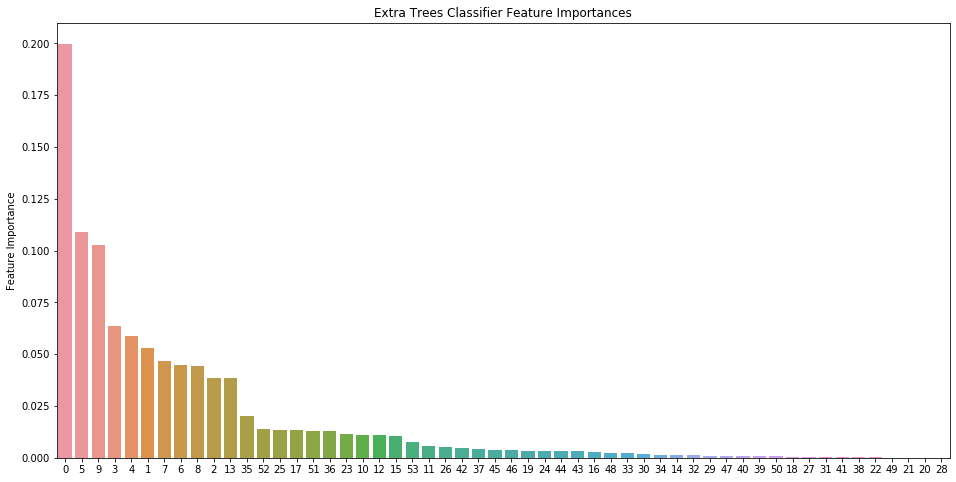

In [7]:
ETC_fi = pd.DataFrame({'Feature Importance': model_ETC.feature_importances_})
ETC_fi = ETC_fi.sort_values('Feature Importance',ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=ETC_fi, x=ETC_fi.index, y='Feature Importance', order=list(ETC_fi.index))
plt.title('Extra Trees Classifier Feature Importances')
plt.show()

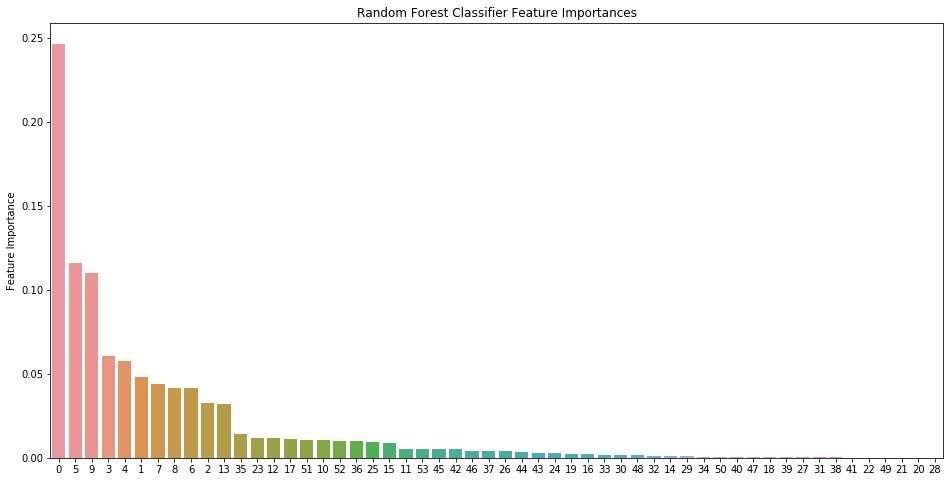

In [8]:
RF_fi = pd.DataFrame({'Feature Importance': model_RF.feature_importances_})
RF_fi = RF_fi.sort_values('Feature Importance',ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=RF_fi, x=RF_fi.index, y='Feature Importance', order=list(RF_fi.index))
plt.title('Random Forest Classifier Feature Importances')
plt.show()

### Permutation Importance
Now we will derive the feature importances based on the permutation method using Bagging Classifier.

In [9]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import BaggingClassifier

In [10]:
bag = BaggingClassifier(verbose=2, random_state=random_seed).fit(X_train, y_train)
per_imp = permutation_importance(bag, X_train, y_train, n_jobs=-1, scoring='accuracy', random_state=random_seed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s finished


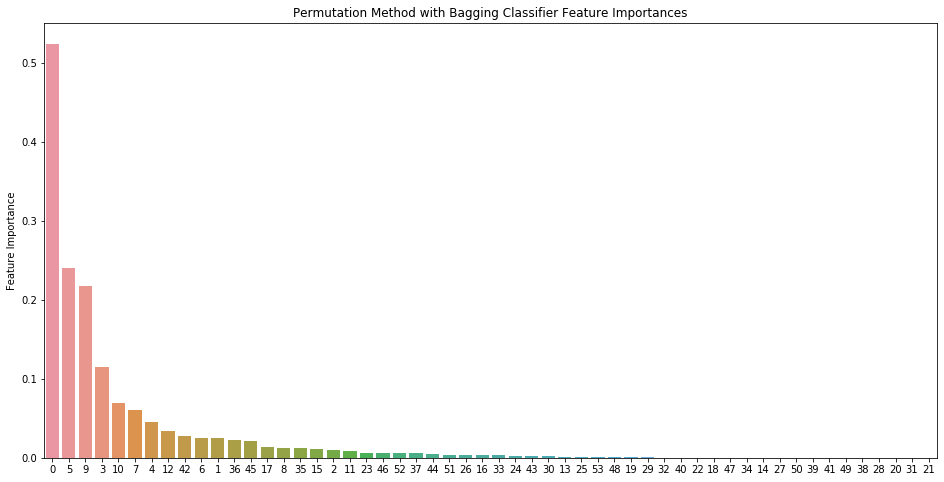

In [11]:
PM_fi = pd.DataFrame({'Feature Importance': per_imp.importances_mean})
PM_fi = PM_fi.sort_values('Feature Importance',ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=PM_fi, x=PM_fi.index, y='Feature Importance', order=list(PM_fi.index))
plt.title('Permutation Method with Bagging Classifier Feature Importances')
plt.show()

#### Observations:
* The Extra Trees Classifier and Random Forest Classifier produce almost the same order of feature importances. 
* Permutation method agrees with the two above to a large extent in the importance order of features. However, it places twice as much weight to the most important feature (Elevation) as the other two do.
* One must note that columns 14 through 53 are not independent features; they are one-hot coded columns of one feature, i.e. Soil_Type. Moreover, columns 10 through 13 are one-hot coded columns of Wilderness_Area.
* All three methods agree that feature 0 (Elevation) is the most important towards predicting forest cover type which is in agreement with common sense (at least with what I learned in science class in the 8th grade).

## Step 3: Dropping least important features from the dataset and refitting the model
We will use Bagging Classifier with n_estimators=10 (which is the dafault setting) to conserve computation time.

In [12]:
from sklearn.metrics import accuracy_score

bagc = BaggingClassifier(n_estimators=10, n_jobs=-1, random_state=random_seed)

ETC_fi_list = list(ETC_fi.sort_values('Feature Importance').index)
RF_fi_list = list(RF_fi.sort_values('Feature Importance').index)
PM_fi_list = list(PM_fi.sort_values('Feature Importance').index)

In [13]:
ETC_accuracy = []

for n in range(0, 54):
    X_train_etc = X_train.drop(ETC_fi_list[0: n], axis=1)
    X_test_etc = X_test.drop(ETC_fi_list[0: n], axis=1)
    bagc.fit(X_train_etc, y_train)
    preds = bagc.predict(X_test_etc)
    ETC_accuracy.append(accuracy_score(y_test, preds))

In [14]:
RF_accuracy = []

for n in range(0, 54):
    X_train_rf = X_train.drop(RF_fi_list[0: n], axis=1)
    X_test_rf = X_test.drop(RF_fi_list[0: n], axis=1)
    bagc.fit(X_train_rf, y_train)
    preds = bagc.predict(X_test_rf)
    RF_accuracy.append(accuracy_score(y_test, preds))

In [15]:
PM_accuracy = []

for n in range(0, 54):
    X_train_pm = X_train.drop(PM_fi_list[0: n], axis=1)
    X_test_pm = X_test.drop(PM_fi_list[0: n], axis=1)
    bagc.fit(X_train_pm, y_train)
    preds = bagc.predict(X_test_pm)
    PM_accuracy.append(accuracy_score(y_test, preds))

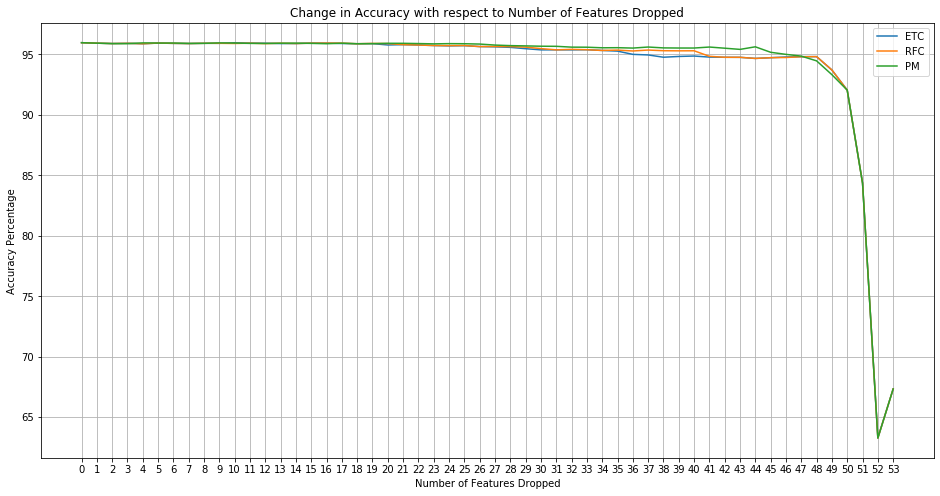

In [16]:
results_df = pd.DataFrame({'Number of Features Dropped': list(range(0, 54)), 
                           'ETC Accuracy': np.round(ETC_accuracy, 5) * 100,
                           'RFC Accuracy': np.round(RF_accuracy, 5) * 100, 
                           'PM Accuracy': np.round(PM_accuracy, 5) * 100})

plt.figure(figsize=(16, 8))
plt.plot(results_df.iloc[:, 0], results_df.iloc[:, 1], label='ETC')
plt.plot(results_df.iloc[:, 0], results_df.iloc[:, 2], label='RFC')
plt.plot(results_df.iloc[:, 0], results_df.iloc[:, 3], label='PM')
plt.xlabel('Number of Features Dropped')
plt.ylabel('Accuracy Percentage')
plt.xticks(list(range(0, 54)))
plt.title('Change in Accuracy with respect to Number of Features Dropped')
plt.legend()
plt.grid()
plt.show()

#### Observations:
* It is amazing that one can achieve 95% accuracy with only 6 features.
* The three methods employed for feature importance performed similarly on this dataset.
* Note that this is a naive application (using a greedy approach) of the idea of feature selection which worked surprisingly well for this dataset.